In [1]:
%pip install pandas numpy scikit-learn xgboost matplotlib seaborn joblib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
##Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils import preprocess_data

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

os.makedirs('ml_project/outputs', exist_ok=True)


In [5]:
#Load + Preprocess
print("\n" + "="*70)
print("EXPLORATORY DATA ANALYSIS")
print("="*70)

print("Loading data...")
df = pd.read_csv(r"C:\Users\kewar\Downloads\Dataset.csv")

print("Preprocessing data...")
df = preprocess_data(df)



EXPLORATORY DATA ANALYSIS
Loading data...
Preprocessing data...

=== Starting Data Preprocessing ===

Initial shape: (45593, 11)
After removing duplicates: (45593, 11)
After removing invalid coordinates: (45593, 11)
Removed 0 rows with unrealistic delivery times
Added delivery distance feature. Mean distance: 99.30 km
Added experience score feature. Mean score: 136.73
Removed 270 outliers from Delivery Time_taken(min)
Removed 427 outliers from delivery_distance_km

Final processed shape: (44896, 13)

=== Preprocessing Complete ===



In [7]:
##Descriptive Statistics
print("\n" + "="*70)
print("DESCRIPTIVE STATISTICS")
print("="*70)

print("\nDelivery Time Statistics:")
print(df['Delivery Time_taken(min)'].describe())

print("\nDistance Statistics:")
print(df['delivery_distance_km'].describe())

print("\nRating Statistics:")
print(df['Delivery_person_Ratings'].describe())

print("\nAge Statistics:")
print(df['Delivery_person_Age'].describe())

print("\nVehicle Type Distribution:")
print(df['Type_of_vehicle'].value_counts())

print("\nOrder Type Distribution:")
print(df['Type_of_order'].value_counts())



DESCRIPTIVE STATISTICS

Delivery Time Statistics:
count    44896.000000
mean        26.139612
std          9.182103
min         10.000000
25%         19.000000
50%         25.000000
75%         32.000000
max         51.000000
Name: Delivery Time_taken(min), dtype: float64

Distance Statistics:
count    44896.000000
mean         9.714338
std          5.607242
min          1.465067
25%          4.663188
50%          9.219692
75%         13.681057
max         20.969489
Name: delivery_distance_km, dtype: float64

Rating Statistics:
count    44896.000000
mean         4.633509
std          0.322519
min          1.000000
25%          4.600000
50%          4.700000
75%          4.800000
max          6.000000
Name: Delivery_person_Ratings, dtype: float64

Age Statistics:
count    44896.000000
mean        29.524724
std          5.693584
min         15.000000
25%         25.000000
50%         29.000000
75%         34.000000
max         50.000000
Name: Delivery_person_Age, dtype: float64

Vehicle

In [9]:
##Generate Visualizations
print("\n" + "="*70)
print("GENERATING VISUALIZATIONS")
print("="*70 + "\n")



GENERATING VISUALIZATIONS



Saved: ml_project/outputs/delivery_time_distribution.png


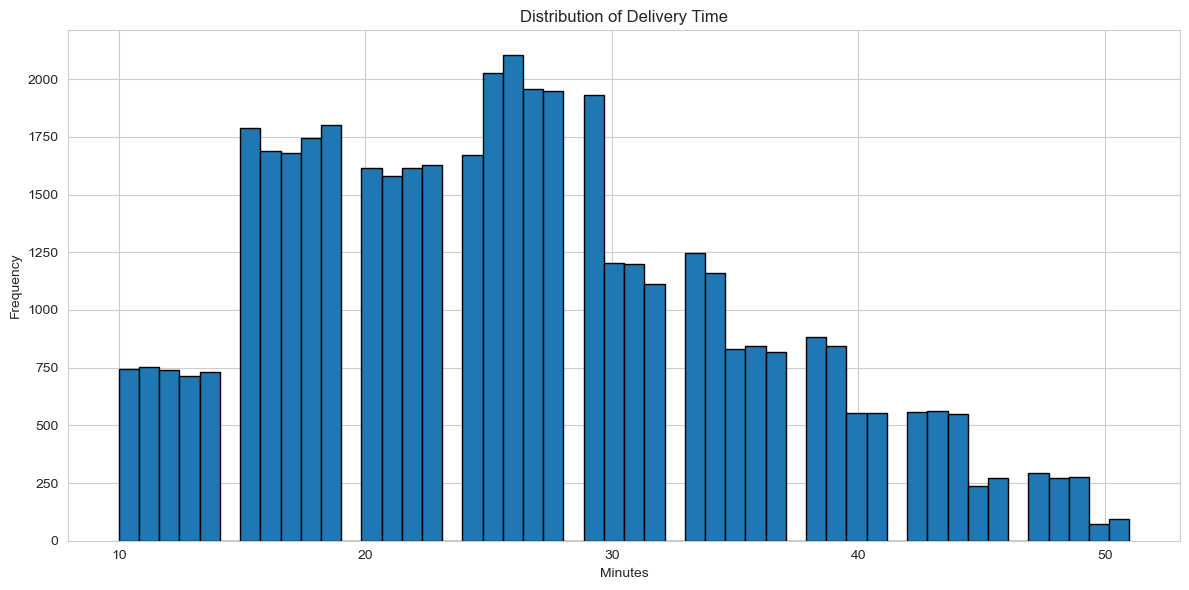

In [11]:
##Delivery Time Distribution
plt.figure(figsize=(12,6))
plt.hist(df['Delivery Time_taken(min)'], bins=50, edgecolor='black')
plt.title('Distribution of Delivery Time')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('ml_project/outputs/delivery_time_distribution.png', dpi=300)
print("Saved: ml_project/outputs/delivery_time_distribution.png")
plt.show()


Saved: ml_project/outputs/correlation_matrix.png


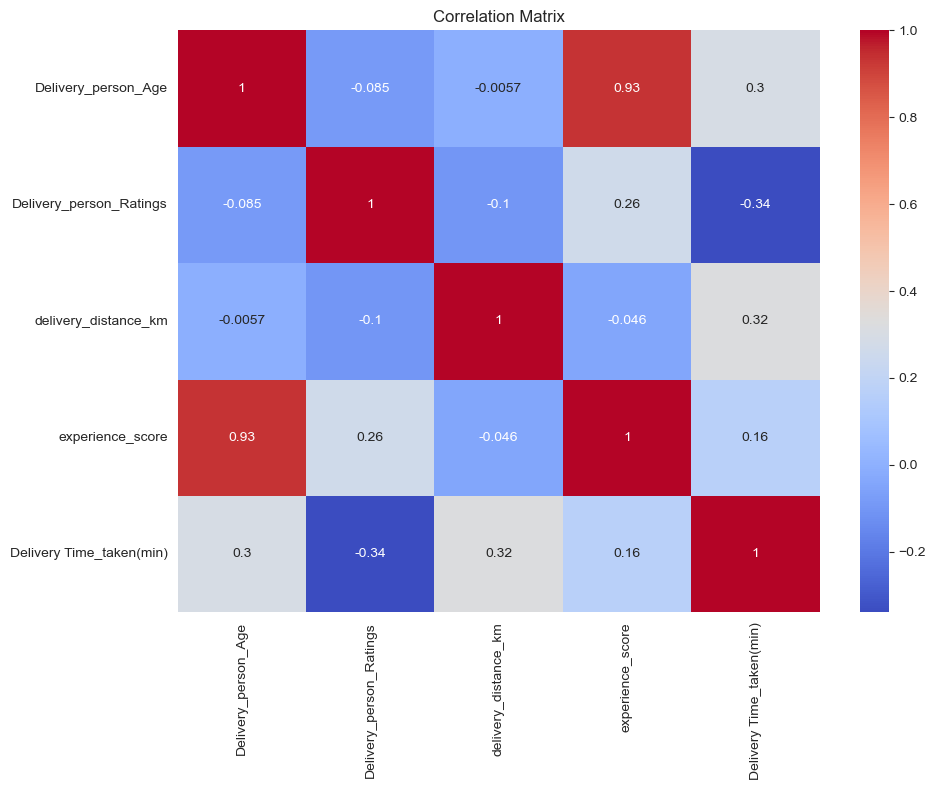

In [13]:
##Correlation Matrix
numerical_cols = [
    'Delivery_person_Age',
    'Delivery_person_Ratings',
    'delivery_distance_km',
    'experience_score',
    'Delivery Time_taken(min)'
]

plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('ml_project/outputs/correlation_matrix.png', dpi=300)
print("Saved: ml_project/outputs/correlation_matrix.png")
plt.show()


Saved: ml_project/outputs/distance_vs_time.png


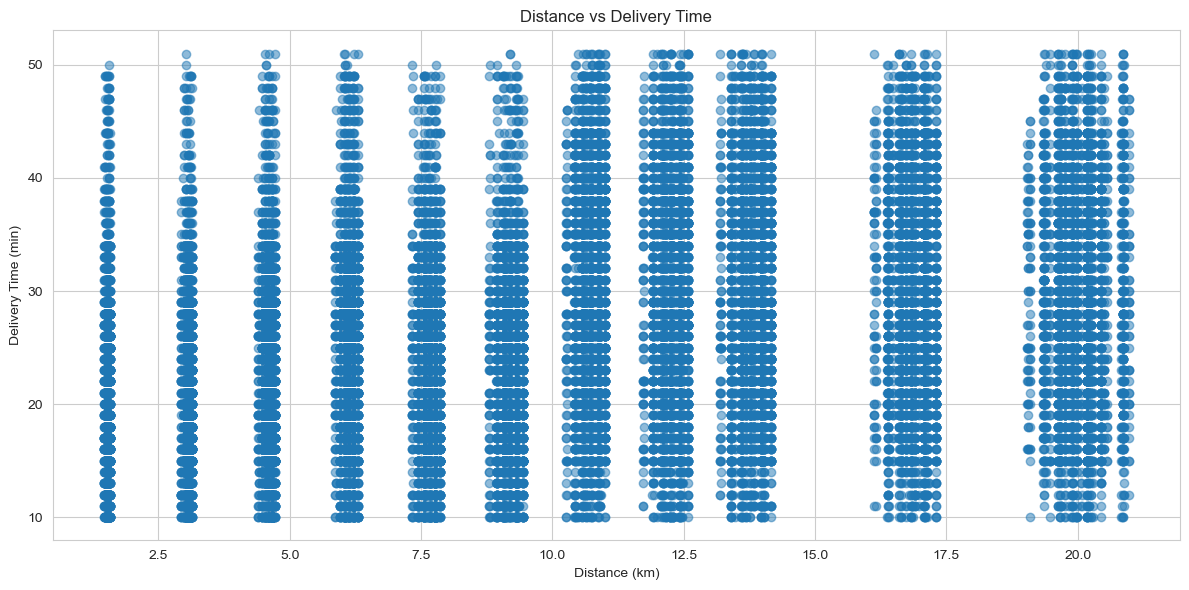

In [15]:
##Distance vs Time
plt.figure(figsize=(12,6))
plt.scatter(df['delivery_distance_km'], df['Delivery Time_taken(min)'], alpha=0.5)
plt.xlabel('Distance (km)')
plt.ylabel('Delivery Time (min)')
plt.title('Distance vs Delivery Time')
plt.tight_layout()
plt.savefig('ml_project/outputs/distance_vs_time.png', dpi=300)
print("Saved: ml_project/outputs/distance_vs_time.png")
plt.show()


Saved: ml_project/outputs/vehicle_type_analysis.png


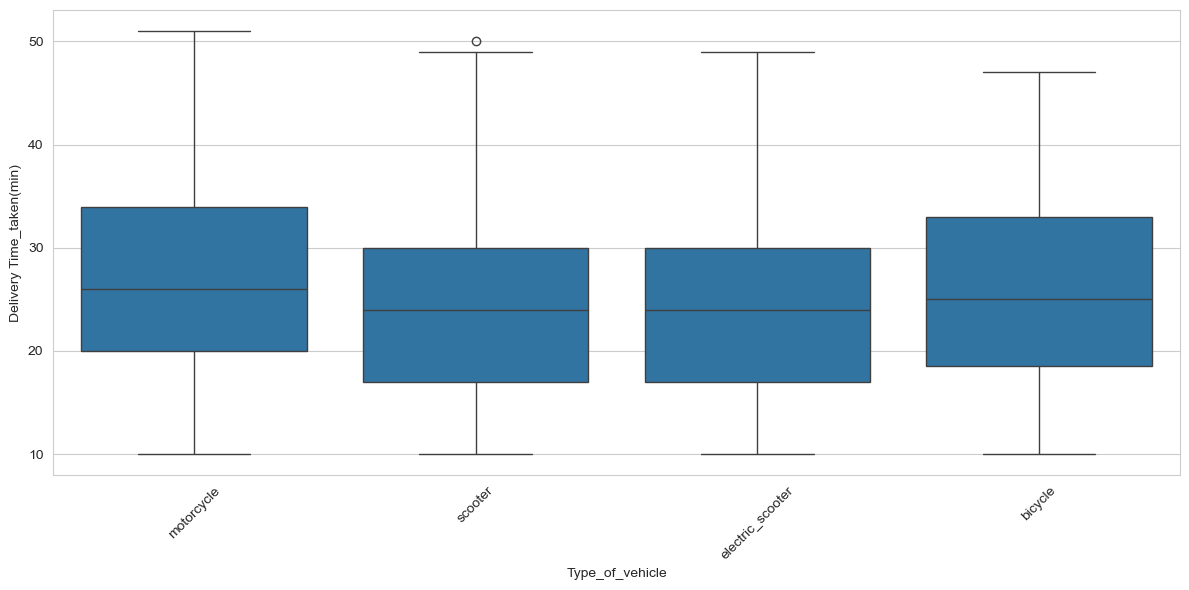

In [16]:
##Vehicle Type
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Type_of_vehicle', y='Delivery Time_taken(min)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('ml_project/outputs/vehicle_type_analysis.png', dpi=300)
print("Saved: ml_project/outputs/vehicle_type_analysis.png")
plt.show()


Saved: ml_project/outputs/order_type_analysis.png


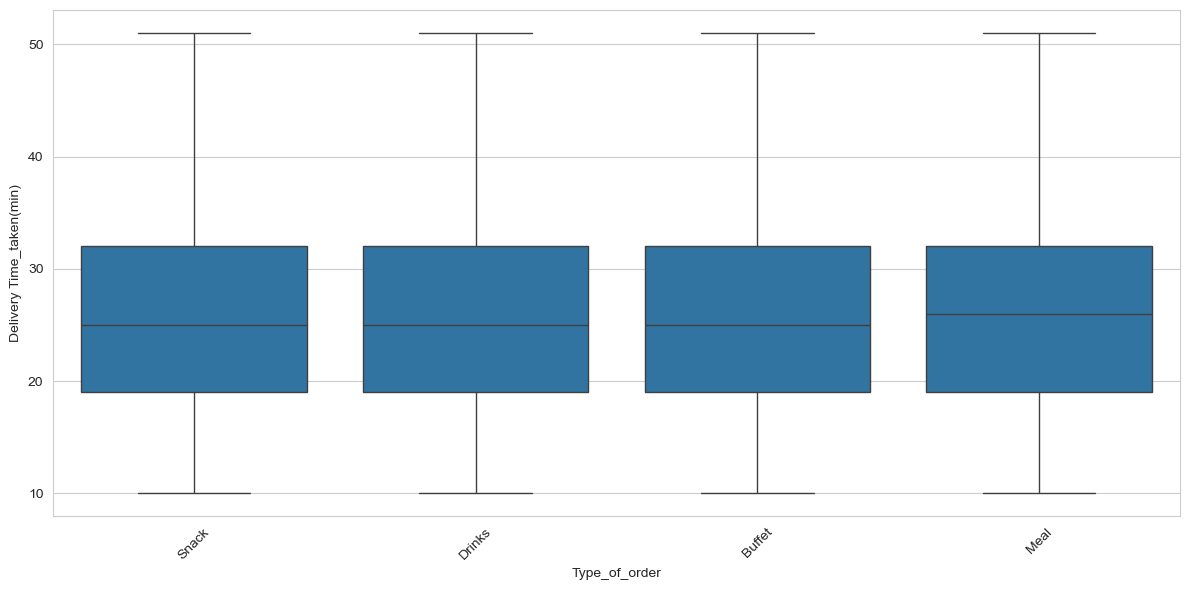

In [21]:
##Order Type
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Type_of_order', y='Delivery Time_taken(min)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('ml_project/outputs/order_type_analysis.png', dpi=300)
print("Saved: ml_project/outputs/order_type_analysis.png")
plt.show()


Saved: ml_project/outputs/rating_vs_time.png


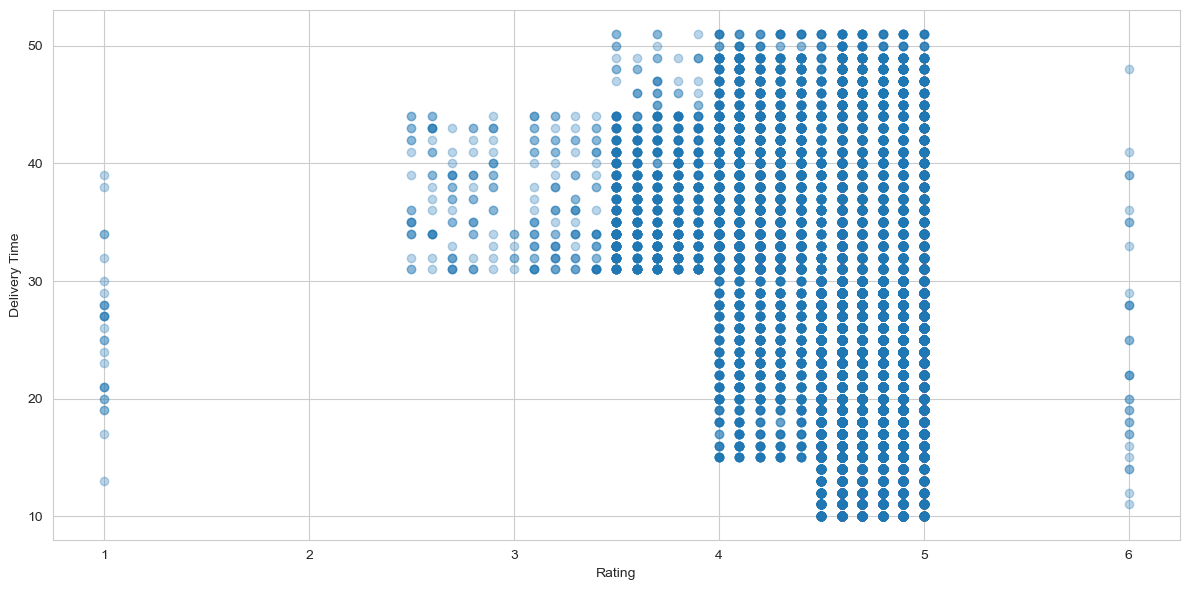


EDA COMPLETE!
All visualizations saved to ml_project/outputs/


In [23]:
##Rating vs Time
plt.figure(figsize=(12,6))
plt.scatter(df['Delivery_person_Ratings'], df['Delivery Time_taken(min)'], alpha=0.3)
plt.xlabel("Rating")
plt.ylabel("Delivery Time")
plt.tight_layout()
plt.savefig('ml_project/outputs/rating_vs_time.png', dpi=300)
print("Saved: ml_project/outputs/rating_vs_time.png")
plt.show()

print("\n" + "="*70)
print("EDA COMPLETE!")
print("All visualizations saved to ml_project/outputs/")
print("="*70)


In [45]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [25]:
##Model_Training
import os
import pandas as pd
import numpy as np
import joblib
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from utils import preprocess_data, encode_categorical_features

os.makedirs('ml_project/models', exist_ok=True)
os.makedirs('ml_project/outputs', exist_ok=True)


In [29]:
#Load + Preprocess
print("\n" + "="*70)
print("DELIVERY TIME PREDICTION - MODEL TRAINING PIPELINE")
print("="*70)

print("Loading data...")
df = pd.read_csv(r"C:\Users\kewar\Downloads\Dataset.csv")
print(f"Loaded {len(df)} rows and {len(df.columns)} columns")

df = preprocess_data(df)



DELIVERY TIME PREDICTION - MODEL TRAINING PIPELINE
Loading data...
Loaded 45593 rows and 11 columns

=== Starting Data Preprocessing ===

Initial shape: (45593, 11)
After removing duplicates: (45593, 11)
After removing invalid coordinates: (45593, 11)
Removed 0 rows with unrealistic delivery times
Added delivery distance feature. Mean distance: 99.30 km
Added experience score feature. Mean score: 136.73
Removed 270 outliers from Delivery Time_taken(min)
Removed 427 outliers from delivery_distance_km

Final processed shape: (44896, 13)

=== Preprocessing Complete ===



In [31]:
##Feature Engineering
df_encoded = encode_categorical_features(df, ['Type_of_order', 'Type_of_vehicle'])

X = df_encoded.drop(columns=[
    'ID',
    'Delivery_person_ID',
    'Delivery Time_taken(min)',
    'Restaurant_latitude',
    'Restaurant_longitude',
    'Delivery_location_latitude',
    'Delivery_location_longitude'
])

y = df_encoded['Delivery Time_taken(min)']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns: {list(X.columns)}")



Features shape: (44896, 10)
Target shape: (44896,)

Feature columns: ['Delivery_person_Age', 'Delivery_person_Ratings', 'delivery_distance_km', 'experience_score', 'Type_of_order_Drinks', 'Type_of_order_Meal', 'Type_of_order_Snack', 'Type_of_vehicle_electric_scooter', 'Type_of_vehicle_motorcycle', 'Type_of_vehicle_scooter']


In [33]:
##Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTrain set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")



Train set size: 35916
Test set size: 8980


In [35]:
##Train Models
def evaluate(model, name):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)

    print(f"\n=== Training {name} ===")
    print(f"Train RMSE: {train_rmse:.2f} | Test RMSE: {test_rmse:.2f}")
    print(f"Train MAE: {train_mae:.2f} | Test MAE: {test_mae:.2f}")
    print(f"Train R²: {train_r2:.4f} | Test R²: {test_r2:.4f}")

    return model, test_rmse

lr, lr_rmse = evaluate(LinearRegression(), "Linear Regression")
rf, rf_rmse = evaluate(RandomForestRegressor(n_estimators=100, random_state=42), "Random Forest")
xgb_model, xgb_rmse = evaluate(xgb.XGBRegressor(n_estimators=200, random_state=42), "XGBoost")



=== Training Linear Regression ===
Train RMSE: 7.69 | Test RMSE: 7.79
Train MAE: 6.16 | Test MAE: 6.22
Train R²: 0.2950 | Test R²: 0.2948

=== Training Random Forest ===
Train RMSE: 2.92 | Test RMSE: 7.70
Train MAE: 2.25 | Test MAE: 6.05
Train R²: 0.8982 | Test R²: 0.3107

=== Training XGBoost ===
Train RMSE: 6.07 | Test RMSE: 7.36
Train MAE: 4.75 | Test MAE: 5.79
Train R²: 0.5608 | Test R²: 0.3703


In [43]:
##Save Best Model
best_model = min(
    [(lr, lr_rmse), (rf, rf_rmse), (xgb_model, xgb_rmse)],
    key=lambda x: x[1]
)[0]

joblib.dump(best_model, 'ml_project/models/best_model.pkl')
joblib.dump(X.columns.tolist(), 'ml_project/models/feature_names.pkl')

print("\nModel saved to ml_project/models/best_model.pkl")
print("\n" + "="*70)
print("TRAINING COMPLETE!")
print("="*70)



Model saved to ml_project/models/best_model.pkl

TRAINING COMPLETE!


In [45]:
##Prediction
import joblib
import pandas as pd
from utils import haversine_distance


In [47]:
##Load Model
model = joblib.load('ml_project/models/best_model.pkl')
feature_names = joblib.load('ml_project/models/feature_names.pkl')


In [49]:
##Prediction Example
print("\n" + "="*70)
print("DELIVERY TIME PREDICTION")
print("="*70)

age = 37
rating = 4.9
rest_lat = 22.745049
rest_lon = 75.892471
del_lat = 22.765049
del_lon = 75.912471
order_type = "Snack"
vehicle_type = "motorcycle"

distance = haversine_distance(rest_lat, rest_lon, del_lat, del_lon)
experience_score = age * rating

input_dict = {
    'Delivery_person_Age': age,
    'Delivery_person_Ratings': rating,
    'delivery_distance_km': distance,
    'experience_score': experience_score
}

input_df = pd.DataFrame([input_dict])

for col in feature_names:
    if col not in input_df.columns:
        input_df[col] = 0

input_df = input_df[feature_names]

prediction = model.predict(input_df)[0]

print("\nInput Details:")
print(f"  Delivery Person Age: {age}")
print(f"  Delivery Person Rating: {rating}")
print(f"  Restaurant Location: ({rest_lat}, {rest_lon})")
print(f"  Delivery Location: ({del_lat}, {del_lon})")
print(f"  Order Type: {order_type}")
print(f"  Vehicle Type: {vehicle_type}")

print("\n" + "-"*70)
print(f"Calculated Distance: {distance:.2f} km")
print(f"PREDICTED DELIVERY TIME: {prediction:.0f} minutes")
print("-"*70)



DELIVERY TIME PREDICTION

Input Details:
  Delivery Person Age: 37
  Delivery Person Rating: 4.9
  Restaurant Location: (22.745049, 75.892471)
  Delivery Location: (22.765049, 75.912471)
  Order Type: Snack
  Vehicle Type: motorcycle

----------------------------------------------------------------------
Calculated Distance: 3.03 km
PREDICTED DELIVERY TIME: 22 minutes
----------------------------------------------------------------------
